# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
data = pd.read_csv("/content/hasil_clustering.csv")

In [4]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
label_encoder = LabelEncoder()
data['Channel'] = label_encoder.fit_transform(data['Channel'])

In [12]:
label_encoder = LabelEncoder()
data['TransactionType'] = label_encoder.fit_transform(data['TransactionType'])

In [13]:
label_encoder = LabelEncoder()
data['CustomerOccupation'] = label_encoder.fit_transform(data['CustomerOccupation'])

In [14]:
data_klasifikasi = data.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'Location',
                                 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])

In [15]:
X = data_klasifikasi.drop(columns=['Cluster'])
y = data_klasifikasi['Cluster']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 1884
Jumlah data testing: 628


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [17]:
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Menggunakan metode Random Forest karena algoritma ini mampu menangani data dengan banyak fitur, mengurangi risiko overfitting, dan memberikan akurasi yang tinggi melalui kombinasi banyak pohon keputusan.

* Menggunakan metode Logistic Regression karena model ini sederhana, cepat dalam proses pelatihan, dan efektif dalam mengklasifikasikan data jika terdapat hubungan linear antara fitur dan target.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"=== Evaluasi {model_name} ===")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf)

=== Evaluasi Logistic Regression ===
Accuracy: 0.61
F1-Score: 0.56
Precision: 0.53
Recall: 0.61


=== Evaluasi Random Forest ===
Accuracy: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


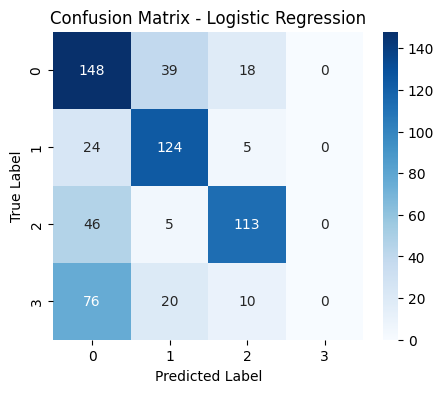

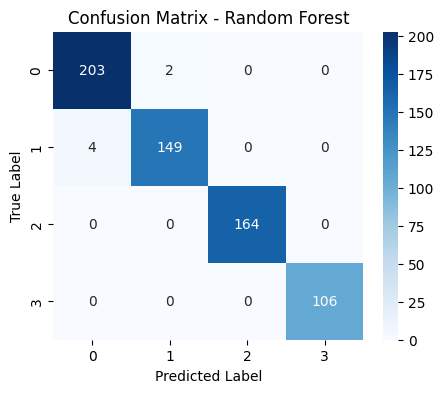

In [20]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## Hasil Analisis

* Logistic Regression digunakan karena merupakan metode yang sederhana dan efektif dalam klasifikasi, terutama jika hubungan antara variabel prediktor dan target bersifat linear. Namun, hasil evaluasi menunjukkan akurasi 0.61, dengan precision 0.53, recall 0.61, dan F1-score 0.56, yang menunjukkan bahwa model ini masih kurang optimal.

* Random Forest dipilih karena kemampuannya dalam menangani data yang lebih kompleks dengan menggabungkan beberapa pohon keputusan. Hasil evaluasi menunjukkan akurasi yang sangat tinggi, yaitu 0.99, dengan precision, recall, dan F1-score masing-masing 0.99, menunjukkan performa yang sangat baik dalam klasifikasi.

Dari perbandingan ini, dapat disimpulkan bahwa Random Forest lebih unggul dalam menangani data dibandingkan Logistic Regression, karena mampu memberikan prediksi yang lebih akurat.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [21]:
# Definisikan hyperparameter untuk Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# GridSearchCV untuk Logistic Regression
grid_logreg = GridSearchCV(LogisticRegression(max_iter=500), param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# Model terbaik Logistic Regression
best_logreg = grid_logreg.best_estimator_
print("Best Hyperparameters Logistic Regression:", grid_logreg.best_params_)


Best Hyperparameters Logistic Regression: {'C': 100, 'solver': 'liblinear'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
y_pred_logreg_best = best_logreg.predict(X_test)

print("\n===== Logistic Regression Terbaik =====")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg_best))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_best))


===== Logistic Regression Terbaik =====
Akurasi: 0.964968152866242
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       205
           1       0.94      0.95      0.94       153
           2       0.97      1.00      0.98       164
           3       1.00      0.94      0.97       106

    accuracy                           0.96       628
   macro avg       0.97      0.96      0.97       628
weighted avg       0.97      0.96      0.96       628



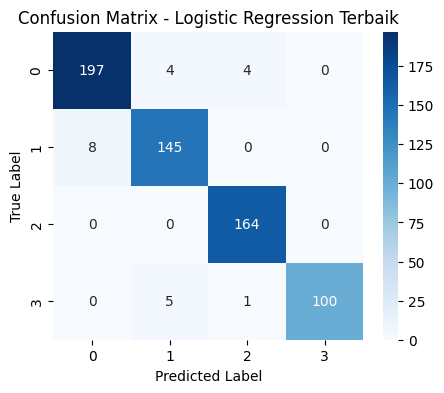

In [24]:
cm = confusion_matrix(y_test, y_pred_logreg_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression Terbaik")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Analisis Hasil Evaluasi Model Klasifikasi

1. Perbandingan hasil evaluasi sebelum dan setelah tuning

  * Logistic Regression mengalami peningkatan akurasi dari 0.61 menjadi 0.96, serta peningkatan F1-Score dari 0.56 menjadi 0.96 setelah tuning.

  * Random Forest sudah memiliki performa yang sangat baik dengan akurasi 0.99, sehingga tidak dilakukan tuning lebih lanjut.

2. Identifikasi kelemahan model

  * Sebelum tuning, Logistic Regression memiliki Precision (0.53) dan Recall (0.61) yang rendah, yang menunjukkan kesulitan dalam mengenali pola data dengan baik.

  * Setelah tuning, Precision meningkat menjadi 0.96 dan Recall meningkat menjadi 0.96, menunjukkan peningkatan signifikan dalam kemampuan model menangkap pola.

  * Random Forest memiliki Precision, Recall, dan F1-Score semuanya 0.99, yang menunjukkan kemungkinan overfitting, karena performanya terlalu sempurna pada data latih dan mungkin kurang mampu menangani data baru.

3. Rekomendasi tindakan lanjutan

  * Validasi model dengan dataset baru untuk memastikan Logistic Regression yang telah dituning tetap berkinerja baik pada data yang belum terlihat sebelumnya.

  * Menguji algoritma lain seperti SVM atau Neural Network untuk melihat apakah ada peningkatan performa lebih lanjut.

  * Melakukan evaluasi lebih lanjut terhadap Random Forest, seperti dengan cross-validation untuk memastikan tidak terjadi overfitting.

  * Menggunakan lebih banyak data atau melakukan data augmentation untuk meningkatkan generalisasi model, terutama jika ingin menghindari ketergantungan model terhadap data latih.